<a href="https://colab.research.google.com/github/dansarmiento/MachineLearning/blob/main/Naive_Bayes_%26_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this workbook we are analyzing a subset of data that contains info about NBA players and their performance records.  We will do feature engineering to determine which features will most effectively predict whether an NBA career will last at least 5 years

In [ ]:
import pandas as pd

In [ ]:
# https://docs.google.com/spreadsheets/d/1GPpQ_lOn-OqvOlhRG2dywl9EOZXJQwCT6--zVveFFH4/edit?usp=sharing

sheet_id = "1GPpQ_lOn-OqvOlhRG2dywl9EOZXJQwCT6--zVveFFH4"
sheet_name = "Sheet1"

gsheet_url = "https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(sheet_id,sheet_name)
df = pd.read_csv(gsheet_url)
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('/','_')
df.head()

,unnamed:_0,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [ ]:
# look for missing values
# nice and clean dataset
df.isna().sum()

,0
unnamed:_0,0
name,0
gp,0
min,0
pts,0
fgm,0
fga,0
fg,0
3p_made,0
3pa,0


In [ ]:
# check for balance in the target variable
# this is more than good enough balance to go forward with
df.target_5yrs.value_counts(normalize=True)

,proportion
target_5yrs,
1,0.620149
0,0.379851


| Column       | Description                                                  |
|--------------|--------------------------------------------------------------|
| name         | Name of NBA player                                           |
| gp           | Number of games played                                       |
| min          | Number of minutes played per game                            |
| pts          | Average number of points per game                            |
| fgm          | Average number of field goals made per game                  |
| fga          | Average number of field goal attempts per game               |
| fg           | Average percent of field goals made per game                 |
| 3p_made      | Average number of three-point field goals made per game      |
| 3pa          | Average number of three-point field goal attempts per game   |
| 3p           | Average percent of three-point field goals made per game     |
| ftm          | Average number of free throws made per game                  |
| fta          | Average number of free throw attempts per game               |
| ft           | Average percent of free throws made per game                 |
| oreb         | Average number of offensive rebounds per game                |
| dreb         | Average number of defensive rebounds per game                |
| reb          | Average number of rebounds per game                          |
| ast          | Average number of assists per game                           |
| stl          | Average number of steals per game                            |
| blk          | Average number of blocks per game                            |
| tov          | Average number of turnovers per game                         |
| target_5yrs  | 1 if career duration ≥ 5 years, 0 otherwise                  |


Selecting columns to use as features:
- number of games a player has played in is correlated to longevity, but if we use this information in combination with other stats to create other features we might make something better
- for example, games played * average points would make a total career points which would be an indicator of a successful player
- minutes per game with games played could also be a good indication of overall player utilization
- there are three different columns about field goals including field goal percentage, field goals made, and field goal attempts
- there are also non-scoring stats for offensive and defensive rebounds along with assists, steals, blocks and turnovers

we will move forward with: gp, min, pts, fg, 3p, ft, reb, ast, stl, blk, tov

In [ ]:
df = df[['gp', 'min', 'pts', 'fg', '3p', 'ft', 'reb', 'ast', 'stl', 'blk', 'tov', 'target_5yrs']]
df.head()

,gp,min,pts,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs
0,36,27.4,7.4,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gp            1340 non-null   int64  
 1   min           1340 non-null   float64
 2   pts           1340 non-null   float64
 3   fg            1340 non-null   float64
 4   3p            1340 non-null   float64
 5   ft            1340 non-null   float64
 6   reb           1340 non-null   float64
 7   ast           1340 non-null   float64
 8   stl           1340 non-null   float64
 9   blk           1340 non-null   float64
 10  tov           1340 non-null   float64
 11  target_5yrs   1340 non-null   int64  
 12  total_points  1340 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 136.2 KB


In [ ]:
# making columns for total points and efficiency

df['total_points'] = df.gp * df.pts
df['efficiency'] = df['total_points'] / (df['min'] * df['gp'])
df.head()

,gp,min,pts,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
0,36,27.4,7.4,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,0.270073
1,35,26.9,7.2,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,0.267658
2,74,15.3,5.2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,0.339869
3,58,11.6,5.7,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,0.491379
4,48,11.5,4.5,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,0.391304


Prepare for naive bayes model later which means that the features have to be independent of each other.  if features are aggregated to make new features, it may be necessary to remove the original features

In [ ]:
df.drop(columns =['gp','pts','min'], inplace=True)
df.head()

,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,0.270073
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,0.267658
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,0.339869
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,0.491379
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,0.391304


**naive bayes model**



In [ ]:
from sklearn import naive_bayes
from sklearn import model_selection
from sklearn import metrics

In [ ]:
y = df.target_5yrs
X = df.drop(columns='target_5yrs', axis=1)

In [ ]:
# the data indicates that all the predictor variables are continuous numerical values so we will select a model to suit this
X.head()

,fg,3p,ft,reb,ast,stl,blk,tov,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,266.4,0.270073
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,252.0,0.267658
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,384.8,0.339869
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,330.6,0.491379
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,216.0,0.391304


In [ ]:
# split the data

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=42)


**what naive bayes model should we use**

under the assumption that the features are normally distributed and continuous, the gaussian algorith is best

In [ ]:
# fit the model to the training data and predict on the test data

nb = naive_bayes.GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [ ]:
# lets look at the model performance:

metric_funcs = {
    'accuracy score': metrics.accuracy_score,
    'precision score': metrics.precision_score,
    'recall score': metrics.recall_score,
    'f1 score': metrics.f1_score
}

# Loop through the dictionary and print each score
for name, func in metric_funcs.items():
    print(f'{name}:', func(y_test, y_pred))

accuracy score: 0.6537313432835821
precision score: 0.8382352941176471
recall score: 0.5480769230769231
f1 score: 0.6627906976744186


| **Metric**   | **Value** | **Interpretation** |
|--------------|-----------|---------------------|
| Accuracy     | 0.6537    | About 65% of all predictions were correct overall. Not bad, but room for improvement. |
| Precision    | 0.8382    | When the model predicted the positive class, it was correct 84% of the time. This suggests few false positives. |
| Recall       | 0.5481    | The model captured only 55% of the actual positive cases. This indicates many false negatives were missed. |
| F1 Score     | 0.6628    | The harmonic mean of precision and recall. It's a balance between the two, and at 66%, suggests moderate overall quality, leaning toward high precision but lower recall. |


💡 What This Tells You
Your model is conservative in predicting the positive class (high precision) but misses a lot of actual positives (low recall).

This behavior is acceptable when false positives are costly (e.g., spam filters, fraud detection alerts).

But it’s not ideal in scenarios like medical diagnosis, where missing actual positives can be risky.

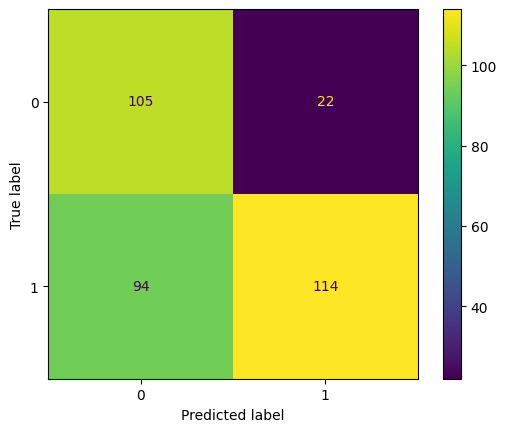

In [ ]:
# evaluate visually with a confusion matrix

cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp.plot()

**How would you present your results to your team?**
- Showcase the data used to create the prediction and the performance of the model overall.
- Review the sample output of the features and the confusion matrix to indicate the model's performance.
- Highlight the metric values, emphasizing the F1 score.

**How would you summarize your findings to stakeholders?**
- The model created provides some value in predicting an NBA player's chances of playing for five years or more.
- Notably, the model performed better at predicting true positives than it did at predicting true negatives. In other words, it more accurately identified those players who will likely play for more than five years than it did those who likely will not.